# <a id='toc1_'></a>[ Lab PCA: Principal Component Analysis (PCA) using prince on the Iris Dataset](#toc0_)

**@author : Samuel BIENVENU**

**@email : samuel.bienvenu@protonmail.com**

**Table of contents**<a id='toc0_'></a>    
- [ Lab PCA: Principal Component Analysis (PCA) using prince on the Iris Dataset](#toc1_)    
  - [  Setting up the Environment and Loading Data](#toc1_1_)    
    - [Required librairies](#toc1_1_1_)    
    - [Load and Explore the Iris Dataset](#toc1_1_2_)    
    - [Explanatory Data Analysis](#toc1_1_3_)    
  - [Performing PCA using prince](#toc1_2_)    
    - [Initialize PCA with 2 components](#toc1_2_1_)    
    - [Fit the PCA model](#toc1_2_2_)    
    - [Extract Principal Components and explained variance](#toc1_2_3_)    
  - [Vizualisation](#toc1_3_)    
    - [Scree plot](#toc1_3_1_)    
    - [Correlation circle](#toc1_3_2_)    
    - [Score plot](#toc1_3_3_)    
    - [Biplot](#toc1_3_4_)    
  - [Interpretation and Analysis](#toc1_4_)    
    - [Scree plot interpretation](#toc1_4_1_)    
    - [Correlation circle interpretation](#toc1_4_2_)    
    - [Score plot interpretation](#toc1_4_3_)    
  - [Conclusion and Q&A](#toc1_5_)    
    - [Summary](#toc1_5_1_)    
    - [Q&A](#toc1_5_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[  Setting up the Environment and Loading Data](#toc0_)

In [1]:
pip install prince==0.7.1


  Using cached prince-0.7.1-py3-none-any.whl.metadata (24 kB)
Using cached prince-0.7.1-py3-none-any.whl (21 kB)


In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


### <a id='toc1_1_1_'></a>[Required librairies](#toc0_)

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import prince

### <a id='toc1_1_2_'></a>[Load and Explore the Iris Dataset](#toc0_)

In [4]:
from sklearn.datasets import load_iris
iris=load_iris()
X=pd.DataFrame(iris.data, columns=iris.feature_names)
Y=pd.Series(iris.target,name='species')

In [5]:
X[15:42]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
15,5.7,4.4,1.5,0.4
16,5.4,3.9,1.3,0.4
17,5.1,3.5,1.4,0.3
18,5.7,3.8,1.7,0.3
19,5.1,3.8,1.5,0.3
20,5.4,3.4,1.7,0.2
21,5.1,3.7,1.5,0.4
22,4.6,3.6,1.0,0.2
23,5.1,3.3,1.7,0.5
24,4.8,3.4,1.9,0.2


In [6]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [7]:
# Add the species column to DataFrame
X['species']=Y.map({0:'setosa', 1:'versicolor', 2:'virginica'})
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
Y.value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

### <a id='toc1_1_3_'></a>[Explanatory Data Analysis](#toc0_)

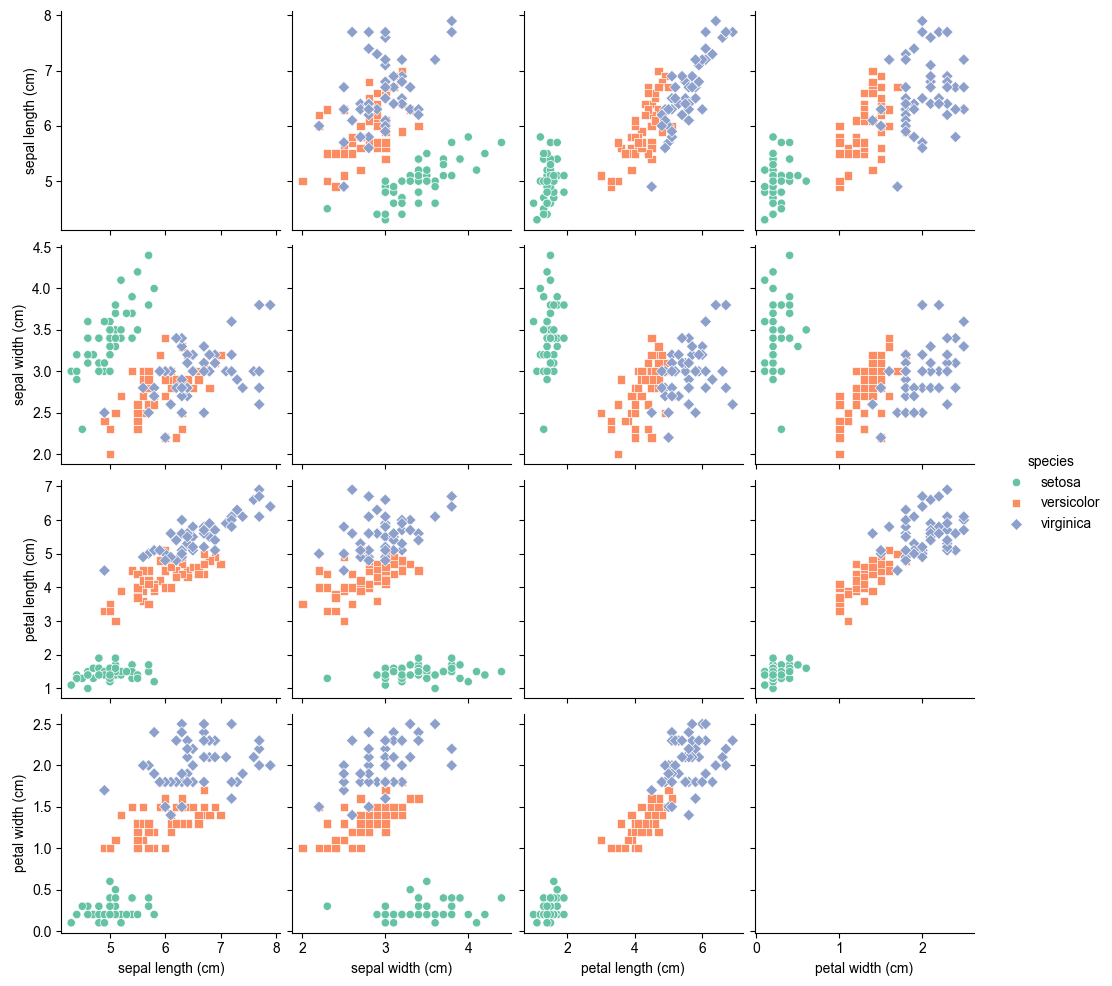

In [9]:
# Create the pairplot
sns.pairplot(X, hue='species', diag_kind='none', palette='Set2', markers=['o','s','D'])

# Show the plot
sns.set(style='ticks')
sns.despine()

## <a id='toc1_2_'></a>[Performing PCA using prince](#toc0_)

### <a id='toc1_2_1_'></a>[Initialize PCA with 2 components](#toc0_)

In [10]:
pca= prince.PCA(
    n_components=2,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
)
pca

PCA(random_state=42)

### <a id='toc1_2_2_'></a>[Fit the PCA model](#toc0_)

In [11]:
X=pd.DataFrame(iris.data, columns=iris.feature_names)
X['species']=Y
pca= pca.fit(X)
pca

PCA(random_state=42)

### <a id='toc1_2_3_'></a>[Extract Principal Components and explained variance](#toc0_)

In [12]:
X_pca= pca.transform(X)
X_pca['species']=Y.map({0:'setosa', 1:'versicolor', 2:'virginica'})
X_pca['ID']= X.index # Add row IDs
X_pca.head()


,0,1,species,ID
0,-2.576120,0.474499,setosa,0
1,-2.415322,-0.678092,setosa,1
2,-2.659333,-0.348282,setosa,2
3,-2.601991,-0.603306,setosa,3
4,-2.683744,0.640220,setosa,4


Print explained variance:

In [13]:
print("explained variance by each component:", pca.explained_inertia_)

explained variance by each component: [0.76740358 0.18282727]


## <a id='toc1_3_'></a>[Vizualisation](#toc0_)

### <a id='toc1_3_1_'></a>[Scree plot](#toc0_)

To visualize the explained variance by each principal component.

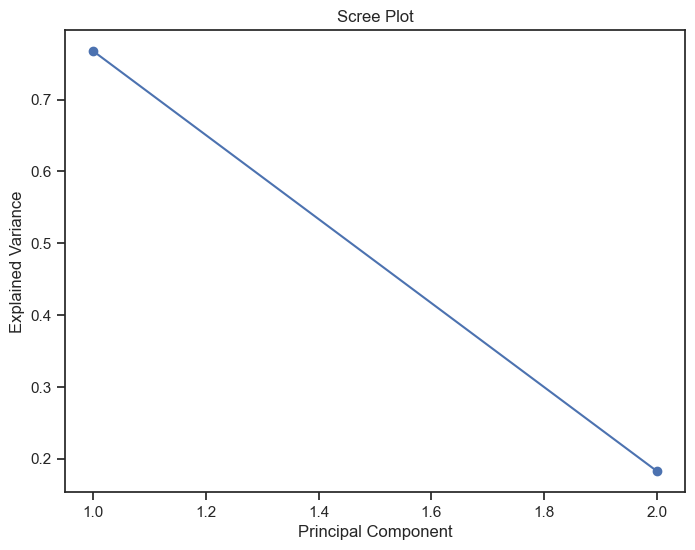

In [14]:
plt.figure(figsize=(8,6))
plt.plot(range(1, len(pca.explained_inertia_)+1), pca.explained_inertia_, marker='o')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")
plt.show()

### <a id='toc1_3_2_'></a>[Correlation circle](#toc0_)

To visualize how the original features correlate with the principal components.

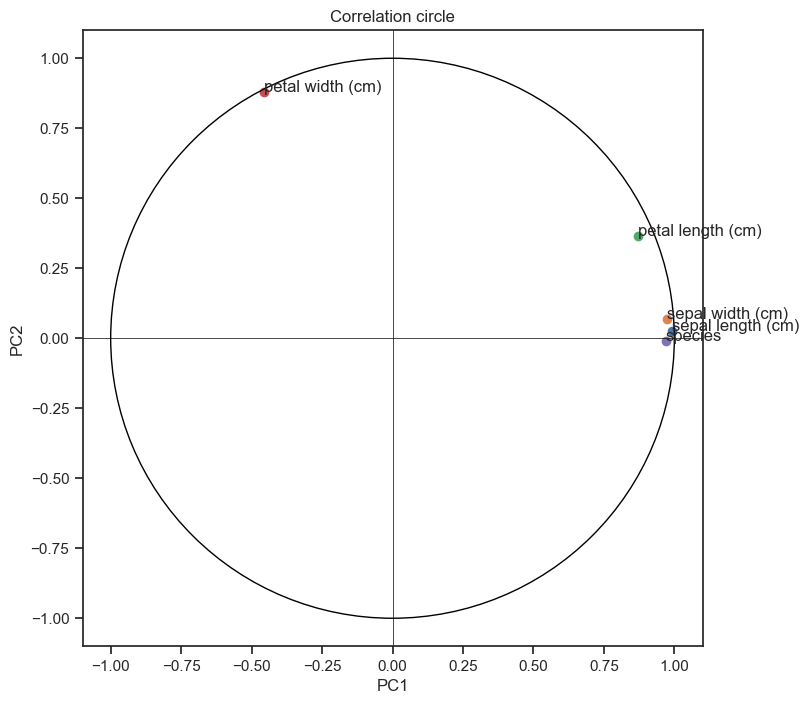

In [15]:
fig, ax= plt.subplots(figsize=(8,8))

for i, (x,y) in enumerate(pca.column_correlations(X).values):
    plt.scatter(x,y)
    plt.text(x, y, X.columns[i], fontsize=12)

circle= plt.Circle((0,0), 1, color="black", fill=False)
ax.add_artist(circle)

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.title('Correlation circle')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### <a id='toc1_3_3_'></a>[Score plot](#toc0_)

To visualize the data in the principal component space. 

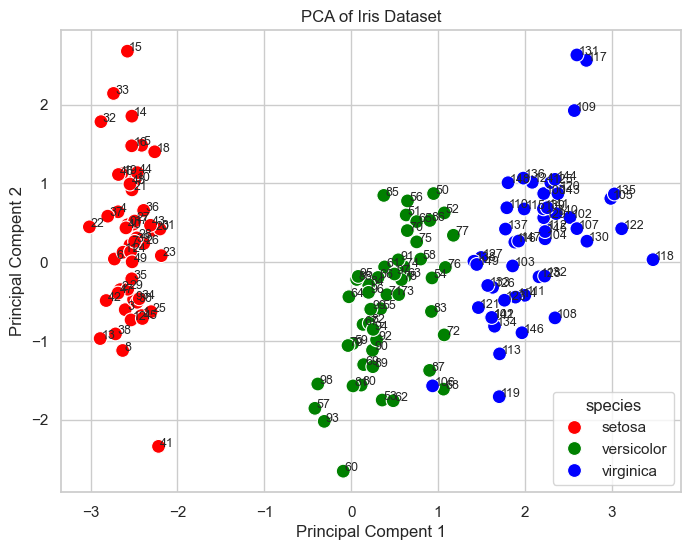

In [16]:
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[0], y=X_pca[1],
    hue=X_pca["species"],
    palette=['red','green','blue'],
    s=100
)

# Annotate each point with it rows ID
for i in range(X_pca.shape[0]):
    plt.text(
        X_pca[0].iloc[i]+0.02,
        X_pca[1].iloc[i],
        str(X_pca['ID'].iloc[i]),
        fontsize=9
    )

plt.title("PCA of Iris Dataset")
plt.xlabel("Principal Compent 1")
plt.ylabel("Principal Compent 2")
plt.show()

### <a id='toc1_3_4_'></a>[Biplot](#toc0_)

To visualize the scores of individuals/data (rows) and loadings of variable/features 
(columns) in the new principal component space.

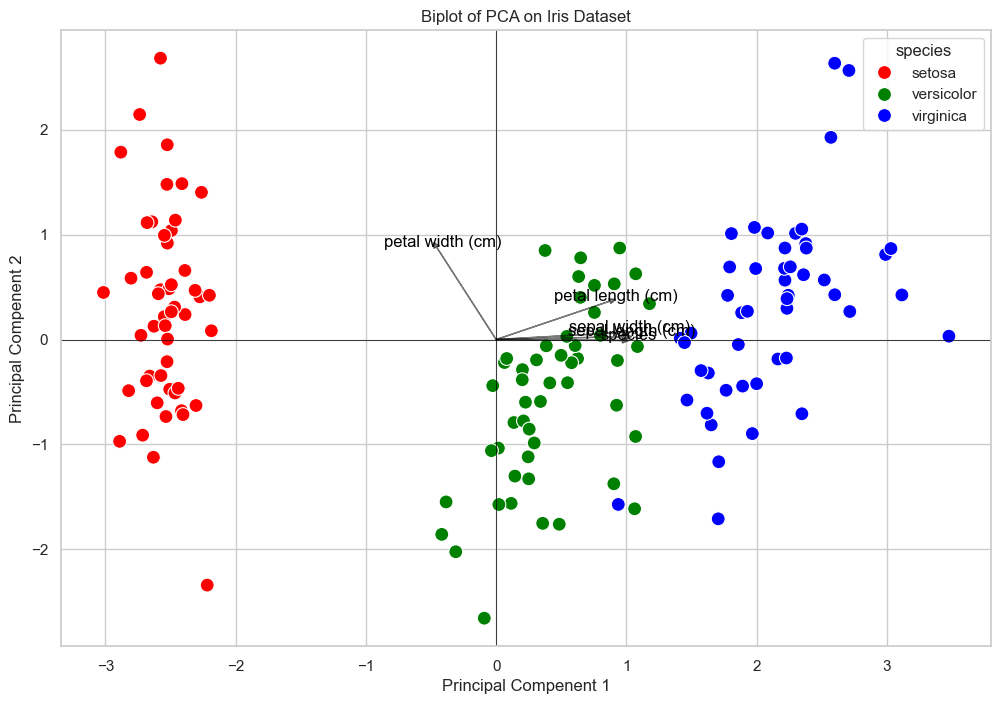

In [17]:
# plot the loadings (vectors showing the direction of the original features)
# get the loadings (correlations of original features with the principal components)
loadings= pca.column_correlations(X)

#set the seaborn style
sns.set(style="whitegrid")

# create the biplot
plt.figure(figsize=(12,8))

#plot the scores (data point in PC space)
sns.scatterplot(
    x=X_pca[0], y=X_pca[1],
    hue=X_pca['species'],
    palette=['red', 'green', 'blue'],
    s=100
)

# Annotate each point with row ID
for i in range(loadings.shape[0]):
    plt.arrow(0,0, loadings.iloc[i, 0], loadings.iloc[i, 1],
              color="black", alpha=0.5, head_width=0.05, head_length=0.05)
    plt.text(loadings.iloc[i, 0]+ 0.05, loadings.iloc[i, 1]+ 0.05,
             X.columns[i], color='black', ha='center', va='center', fontsize=12)
    
plt.title("Biplot of PCA on Iris Dataset")
plt.xlabel("Principal Compenent 1")
plt.ylabel("Principal Compenent 2")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

## <a id='toc1_4_'></a>[Interpretation and Analysis](#toc0_)

### <a id='toc1_4_1_'></a>[Scree plot interpretation](#toc0_)

The scree plot shows the amount of variance explained by each principal component. The first two components together explain approximately 95% of the **total variance** - PC1 accounts for about 77% and PC2 explains an additional 18%. This indicates that these two components are sufficient to capture most of the information in the dataset, allowing for an effective dimensionality reduction from four dimensions (the original features) to two without significant loss of information.

The importance of higher components (PC3, PC4) is minimal since they account for a very small portion of the variance. These higher components are likely dominated by noise or very specific variations in the data that do not contribute much to overall patterns. Therefore, it is justifiable to focus on the first two components for further analysis, as they capture nearly all of the dataset's structure.

### <a id='toc1_4_2_'></a>[Correlation circle interpretation](#toc0_)

The correlation circle helps visualize how the original features (sepal and petal measurements) contribute to the principal components:

-**Petal length** and **petal width** have strong correlations with PC1, meaning they contribute significantly to the variance captured by this component. Both of these features are positioned far from the origin and near the outer edge of the circle along the PC1 axis, showing that they are highly influential in determining the direction of the first principal component.

-**Sepal length**, **sepal width** ans **species** are more closely associated with PC2, suggesting that they contribute more to the variance captured by this component. Their position indicates that these features add variance in directions orthogonal to petal features, meaning they provide different information about the dataset’s structure.

The correlation circle also highlights the relationships between features. Since petal length and petal width are grouped closely together, they are highly correlated with each other. On the other hand, sepal width and sepal length have a different direction, indicating they are less correlated with petal measurements. The circle helps us understand how the features relate to each other and how their contributions differ in explaining the variance of the data.

### <a id='toc1_4_3_'></a>[Score plot interpretation](#toc0_)

The score plot (also known as the PCA scatter plot) represents how the data points (iris species) are distributed in the two-dimensional space formed by the first two principal components (PC1 and PC2):

-**Setosa forms** a well-defined cluster that is clearly separated from the other two species. This indicates that Setosa can be easily distinguished based on the first two principal components, implying strong separability from Versicolor and Virginica in this reduced space.

-**Versicolor** and **Virginica** overlap somewhat in the principal component space, indicating that they are harder to separate compared to Setosa. However, there is still some differentiation between the two, with Versicolor tending to cluster in the middle and Virginica occupying the right side of the plot. The overlap suggests that while PCA captures most of the variance, these two species share similar characteristics that make them less easily distinguishable.

The grouping of species in the PCA space highlights that PCA is effective in reducing the dataset's dimensionality while maintaining enough information to separate at least one of the species (Setosa). The overlap between Versicolor and Virginica suggests that more complex techniques, or additional features, might be needed to fully distinguish these two species.

## <a id='toc1_5_'></a>[Conclusion and Q&A](#toc0_)

### <a id='toc1_5_1_'></a>[Summary](#toc0_)

In this report, we performed Principal Component Analysis (PCA) on the Iris dataset using the **prince** library. The following steps were carried out:

1. **Data Preparation**: We first loaded the Iris dataset, which contains measurements for sepal length, sepal width, petal length, petal width, and species labels.

2. **Data Standardization**: Since PCA is sensitive to the scale of the data, the features were standardized to have zero mean and unit variance, ensuring that all measurements contributed equally to the PCA.

3. **PCA Computation**: We applied PCA using the prince library, reducing the dataset's dimensionality from four original features to two principal components (PC1 and PC2). This allowed us to visualize the dataset in a two-dimensional space, while still capturing most of the variance.

    - **Visualization**: We generated three key plots to interpret the PCA results:

    - **Scree Plot**: Showed how much variance was explained by each principal component.
    - **Correlation Circle**: Illustrated how the original features contributed to each principal component.
    - **Score Plot**: Demonstrated how the different species were distributed in the principal component space.

**Insights from Visualizations:**

1. **Scree Plot**: The first two components captured around 95% of the variance in the data, with the first component explaining the majority (~75%). This demonstrated that reducing the dimensionality to two components was a valid and efficient step for analyzing the dataset.

2. **Correlation Circle**: Petal features (length and width) were strongly correlated with the first principal component (PC1), while sepal features were more aligned with the second component (PC2). This showed that the petal measurements provided the most information for distinguishing species in the dataset.

3. **Score Plot**: The plot revealed a clear separation of the Setosa species from the other two species (Versicolor and Virginica), which exhibited some overlap. This indicates that PCA was successful in distinguishing Setosa but may require more components or a different approach to fully separate Versicolor and Virginica.

### <a id='toc1_5_2_'></a>[Q&A](#toc0_)

1. **Open the Floor for Questions**
    - Invite questions related to the steps of performing PCA, the specific use of the prince library, or the interpretation of the visualizations.
2. **Challenges Faced During the Lab**
    - One challenge during the PCA analysis was ensuring the proper standardization of data. Without this step, features measured on different scales could dominate the principal components, leading to misleading results.
    - Another difficulty arose in interpreting the overlapping clusters for Versicolor and Virginica, as PCA alone didn’t fully separate these species. Further investigation or non-linear dimensionality reduction techniques might be required to address this challenge.
3. **Possible Extensions or Applications of PCA**
    - **Extensions to Other Datasets**: PCA can be applied to a wide range of datasets where dimensionality reduction is needed. For instance, it can be used in:
    - **Image compression**: Reducing the dimensionality of images while preserving key features.
    - **Genomics**: Identifying key patterns in high-dimensional gene expression data.
    - **Finance**: Analyzing trends in financial markets by reducing the number of correlated economic indicators.
- **Further PCA Analysis**: An interesting extension could involve examining how adding more components (e.g., PC3 and PC4) affects the separability of Versicolor and Virginica. Alternatively, combining PCA with clustering techniques, such as **K-means** or **Hierarchical Clustering**, could provide further insights into the structure of the data.